# Import neccessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load train and test datasets


In [6]:
test_data = pd.read_csv("D:/CONTENTS/AI/Downloaded/DATASET/titanic/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data = pd.read_csv("D:/CONTENTS/AI/Downloaded/DATASET/titanic/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exprole the data

In [8]:
# Check for missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

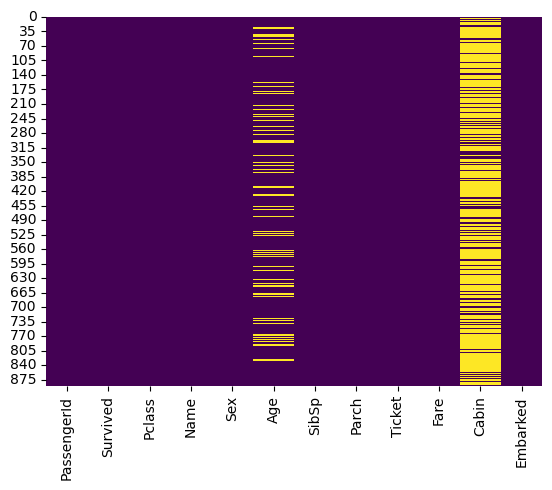

In [ ]:
# Visualize the missing data
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Survival count')

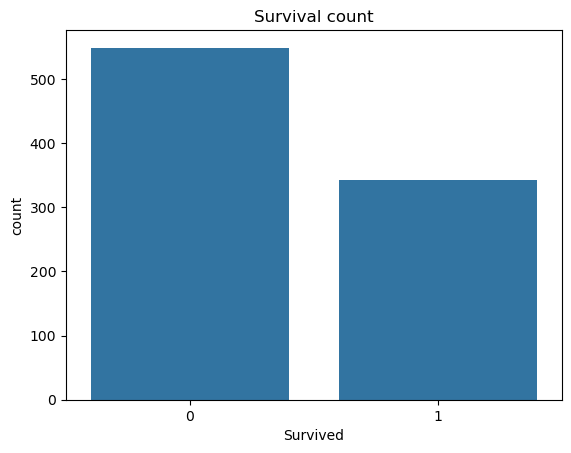

In [10]:
# Explore survival rates
sns.countplot(x='Survived', data=train_data)
plt.title("Survival count")

# Data Cleaning

In [12]:
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')

C:\Users\jacks\AppData\Local\Temp\ipykernel_6392\3333614520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\jacks\AppData\Local\Temp\ipykernel_6392\3333614520.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [13]:
# Drop unnecessary columns
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [23]:
# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
train_data['Sex'] = le_sex.fit_transform(train_data['Sex'])
train_data['Embarked'] = le_embarked.fit_transform(train_data['Embarked'])

# Split the data

In [27]:
# Features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [28]:
# Split into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)


# Scale the Data

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train a Classifier

In [31]:
# Train the model
model = RandomForestClassifier(random_state=50)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [32]:
# Make predictions
y_pred = model.predict(X_val)

In [35]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.7877094972067039
Confusion Matrix:
 [[89 12]
 [26 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       101
           1       0.81      0.67      0.73        78

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179



In [39]:
# Handle missing values
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

if 'Embarked' in test_data.columns:
    test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Only fill or drop 'Cabin' if it exists
if 'Cabin' in test_data.columns:
    test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')
    test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
else:
    test_data = test_data.drop(['Name', 'Ticket'], axis=1, errors='ignore')

# Encode categorical variables
test_data['Sex'] = le_sex.transform(test_data['Sex'])

if 'Embarked' in test_data.columns:
    test_data['Embarked'] = le_embarked.transform(test_data['Embarked'])

# Scale the test data
X_test = scaler.transform(test_data.drop("PassengerId", axis=1))


C:\Users\jacks\AppData\Local\Temp\ipykernel_6392\2284627268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
C:\Users\jacks\AppData\Local\Temp\ipykernel_6392\2284627268.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [40]:
# Predict survival on test data
test_predictions = model.predict(X_test)

# Save predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})
output.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")


Predictions saved to submission.csv


In [41]:
import os
print(os.getcwd())

d:\CONTENTS\AI\CODE\chapter 2
